In [1]:
%matplotlib inline
import os

import cftime

import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean

import cartopy
import cartopy.crs as ccrs

import esmlab

import intake
import intake_esm
%load_ext watermark
%watermark -a "Mike Levy" -d -iv -m -g -h

xarray     0.14.0
cftime     1.0.3.4
cartopy    0.17.0
intake_esm 2019.10.15.post33
cmocean    2.0
matplotlib 3.1.2
numpy      1.17.3
esmlab     2019.4.27.post55
intake     0.5.3
Mike Levy 2019-11-13 

compiler   : GCC 7.3.0
system     : Linux
release    : 3.10.0-693.21.1.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 72
interpreter: 64bit
host name  : casper02
Git hash   : 27db862e247b1ccbde754a28880667f9978714ba


In [2]:
cesm2 = intake.open_esm_datastore('/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/campaign_via_glade-cmip6_NOT_CMORIZED.json')
cesm2.df.head()

,experiment,case,component,stream,variable,date_range,member_id,path,ctrl_branch_year
0,esm-piControl,b.e21.B1850.f09_g17.CMIP6-esm-piControl.001,atm,cam.h1,TREFHTMN,00010101-00101231,0,/glade/campaign/collections/cmip/CMIP6/timeser...,501
1,esm-piControl,b.e21.B1850.f09_g17.CMIP6-esm-piControl.001,atm,cam.h1,TREFHTMN,00110101-00201231,0,/glade/campaign/collections/cmip/CMIP6/timeser...,501
2,esm-piControl,b.e21.B1850.f09_g17.CMIP6-esm-piControl.001,atm,cam.h1,TREFHTMN,00210101-00301231,0,/glade/campaign/collections/cmip/CMIP6/timeser...,501
3,esm-piControl,b.e21.B1850.f09_g17.CMIP6-esm-piControl.001,atm,cam.h1,TREFHTMN,00310101-00401231,0,/glade/campaign/collections/cmip/CMIP6/timeser...,501
4,esm-piControl,b.e21.B1850.f09_g17.CMIP6-esm-piControl.001,atm,cam.h1,TREFHTMN,00410101-00501231,0,/glade/campaign/collections/cmip/CMIP6/timeser...,501


In [3]:
cesm2.df.columns

Index(['experiment', 'case', 'component', 'stream', 'variable', 'date_range',
       'member_id', 'path', 'ctrl_branch_year'],
      dtype='object')

In [4]:
cesm1 = intake.open_esm_datastore('/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cmip5_NOT_CMORIZED.json')
cesm1.df.head()

,experiment,case,component,stream,variable,date_range,member_id,path,ctrl_branch_year
0,1pctCO2-rad,b40.1850_ramp.1deg.ncbcrd.002,ocn,pop.h,IRON_FLUX,000101-014012,0,/glade/p/cgd/oce/projects/cesm2-marbl/intake-e...,151
1,1pctCO2-bgc,b40.1850_ramp.1deg.ncbdrc.001,ocn,pop.h,IRON_FLUX,000101-014012,0,/glade/p/cgd/oce/projects/cesm2-marbl/intake-e...,151
2,1pctCO2,b40.1850_ramp.1deg.ncbdrd.001,ocn,pop.h,IRON_FLUX,000101-014012,0,/glade/p/cgd/oce/projects/cesm2-marbl/intake-e...,151
3,historical,b40.20th.1deg.bdrd.001,ocn,pop.h,IRON_FLUX,185001-200512,0,/glade/p/cgd/oce/projects/cesm2-marbl/intake-e...,151
4,esm-hist,b40.20th.1deg.coup.001,ocn,pop.h,IRON_FLUX,185001-200512,0,/glade/p/cgd/oce/projects/cesm2-marbl/intake-e...,351


In [5]:
keep_vars = ['TAREA', 'TLONG', 'TLAT', 'IRON_FLUX', 'time', 'time_bound', 'member_id']

In [6]:
dq_tmp = cesm2.search(experiment=['historical'], variable='IRON_FLUX')

### WORKAROUND DUE TO BAD DATA ON CAMPAIGN
df = dq_tmp.df.copy()
dq_tmp.df = df[~df.date_range.isin(['185002-190001', '190002-195001', '195002-200001', '200002-201412'])]
###

dq = dq_tmp.to_dataset_dict(cdf_kwargs={'chunks':{'time': 48}})


_, ds2 = dq.popitem()
print("Initial dataset size: {} GB".format(ds2.nbytes/(1024**3)))
ds2 = ds2.drop([v for v in ds2.variables if v not in keep_vars])
print("Reduced dataset size: {} GB".format(ds2.nbytes/(1024**3)))
print(ds2)

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'

--> There will be 1 group(s)
Initial dataset size: 40.798875737935305 GB
Reduced dataset size: 11.784712307155132 GB
<xarray.Dataset>
Dimensions:     (d2: 2, member_id: 11, nlat: 384, nlon: 320, time: 1980)
Coordinates:
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time        (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
  * member_id   (member_id) int64 1 2 3 4 5 6 7 8 9 10 11
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(48, 2), meta=np.ndarray>
    TAREA       (time, nlat, nlon) float64 dask.array<chunksize=(1980, 384, 320), meta=np.ndarray>
    IRON_FLUX   (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 48, 384, 320), meta=np.ndarray>
Attribut

In [7]:
dq = cesm1.search(experiment='historical', variable='IRON_FLUX').to_dataset_dict(cdf_kwargs={'chunks':{'time': 48}})
_, ds1 = dq.popitem()
ds1 = ds1.drop([v for v in ds1.variables if v not in keep_vars])
ds1

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'

--> There will be 1 group(s)


<xarray.Dataset>
Dimensions:     (d2: 2, member_id: 1, nlat: 384, nlon: 320, time: 1872)
Coordinates:
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time        (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00
  * member_id   (member_id) int64 0
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(48, 2), meta=np.ndarray>
    TAREA       (time, nlat, nlon) float64 dask.array<chunksize=(1872, 384, 320), meta=np.ndarray>
    IRON_FLUX   (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 48, 384, 320), meta=np.ndarray>
Attributes:
    title:                     b40.20th.1deg.bdrd.001
    history:                   Sat Dec 17 19:11:26 2011: /usr/local/bin/ncrca...
    conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  D

In [8]:
ds2_ann = esmlab.resample(ds2, freq='ann')
ds2_ann

<xarray.Dataset>
Dimensions:     (d2: 2, member_id: 11, nlat: 384, nlon: 320, time: 165)
Coordinates:
  * member_id   (member_id) int64 1 2 3 4 5 6 7 8 9 10 11
  * time        (time) object 1850-07-01 17:05:00 ... 2014-07-01 17:00:00
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (d2, time) object 1850-01-01 02:00:00 ... 2015-01-01 00:00:00
    TAREA       (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    IRON_FLUX   (member_id, time, nlat, nlon) float64 dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
Attributes:
    history:  \n2019-11-13 15:13:33.680576 esmlab.resample(<DATASET>, freq="a...

In [9]:
ds1_ann = esmlab.resample(ds1, freq='ann')
ds1_ann

<xarray.Dataset>
Dimensions:     (d2: 2, member_id: 1, nlat: 384, nlon: 320, time: 156)
Coordinates:
  * member_id   (member_id) int64 0
  * time        (time) object 1850-07-01 18:02:30 ... 2005-07-01 17:00:00
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (d2, time) object 1850-01-02 01:00:00 ... 2006-01-01 00:00:00
    TAREA       (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    IRON_FLUX   (member_id, time, nlat, nlon) float64 dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
Attributes:
    history:  \n2019-11-13 15:13:37.613816 esmlab.resample(<DATASET>, freq="a...

In [10]:
iron_flux_glb2 = esmlab.weighted_sum(ds2_ann.IRON_FLUX, dim=['nlat', 'nlon'], weights=ds2_ann.TAREA)
iron_flux_glb2 = iron_flux_glb2 * 1.0e-16 * 365.0 * 86400.0 # mmolFe/m^2/s to GmolFe/y
iron_flux_glb2.attrs['units'] = 'Gmol Fe yr$^{-1}$'
iron_flux_glb2 = iron_flux_glb2.compute()
iron_flux_glb2

/glade/work/mlevy/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray (member_id: 11, time: 165)>
array([[9.2300802 , 8.26259593, 8.22607918, ..., 8.87160024, 8.82485228,
        8.11518775],
       [8.32685797, 7.26389874, 8.52567667, ..., 8.69017733, 9.25795746,
        8.37191988],
       [8.1106605 , 8.38003757, 8.23106228, ..., 7.89537625, 8.13547233,
        8.61778304],
       ...,
       [7.61386383, 7.59802859, 8.1020224 , ..., 8.35342317, 8.31701001,
        7.52157364],
       [8.81659523, 7.76057121, 8.21183624, ..., 8.43592903, 7.45949937,
        9.3636691 ],
       [8.24144115, 9.43141237, 9.26289287, ..., 8.58407975, 7.95796275,
        8.55384729]])
Coordinates:
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 9 10 11
  * time       (time) object 1850-07-01 17:05:00 ... 2014-07-01 17:00:00
Attributes:
    units:    Gmol Fe yr$^{-1}$

In [11]:
iron_flux_glb1 = esmlab.weighted_sum(ds1_ann.IRON_FLUX, dim=['nlat', 'nlon'], weights=ds1_ann.TAREA)
iron_flux_glb1 = iron_flux_glb1 * 1.0e-16 * 365.0 * 86400.0 # mmolFe/m^2/s to GmolFe/y
iron_flux_glb1.attrs['units'] = 'Gmol Fe yr$^{-1}$'
iron_flux_glb1 = iron_flux_glb1.compute()
iron_flux_glb1

/glade/work/mlevy/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray (member_id: 1, time: 156)>
array([[6.61582808, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
        6.61378312, 6.61378312, 6.61378312, 6.61378312, 6.61378312,
   

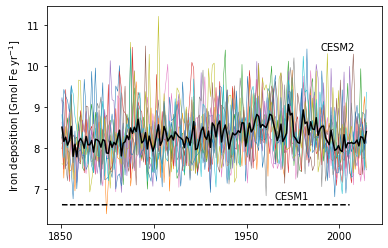

In [12]:
plot_name = f'timeseries.global.IRON_FLUX.pdf'

fig = plt.figure()
ax = fig.add_subplot(111)
for i in iron_flux_glb2.member_id.values:
    ax.plot(iron_flux_glb2.time, iron_flux_glb2.sel(member_id=i), linewidth=0.5)

ax.plot(iron_flux_glb2.time, iron_flux_glb2.mean('member_id'), color='k', linewidth=1.5)    

ax.plot(iron_flux_glb1.time, iron_flux_glb1.isel(member_id=0), linestyle='--', color='k', linewidth=1.5)    

ax.set_ylabel('Iron deposition [Gmol Fe yr$^{-1}$]');

ax.text(cftime.DatetimeNoLeap(1990, 1, 1), iron_flux_glb2.sel(time='1990').max('member_id')*1.05, 'CESM2',color='k');

ax.text(cftime.DatetimeNoLeap(1965, 1, 1), iron_flux_glb1.sel(time='1960')*1.02, 'CESM1',color='k');

#plt.savefig(plot_name,dpi=300,bbox_inches='tight')

In [13]:
mmolm2s_to_molm2yr = 1e-3 * 86400. * 365.
iron_flux_map2 = ds2_ann.IRON_FLUX.sel(time=slice('1995', '2014')).mean(['time', 'member_id'])
iron_flux_map2 = iron_flux_map2.compute() * mmolm2s_to_molm2yr
iron_flux_map2

/glade/work/mlevy/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'IRON_FLUX' (nlat: 384, nlon: 320)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [4.01281948e-08, 3.76392364e-08, 3.66805627e-08, ...,
                   nan,            nan,            nan],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])
Coordinates:
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
Dimensions without coordinates: nlat, nlon

/glade/work/mlevy/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


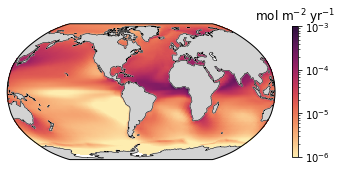

In [14]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))


pc = ax.pcolormesh(ds2.TLONG, ds2.TLAT, iron_flux_map2,
                   norm=colors.LogNorm(vmin=1e-6, vmax=1e-3),
                   cmap=cmocean.cm.matter,
                   transform=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m',
                                                   edgecolor='face',
                                                   facecolor='lightgray'))
ax.set_global() 
ax.coastlines(linewidth=0.5)
cb = plt.colorbar(pc, shrink=0.6)
cb.ax.set_title('mol m$^{-2}$ yr$^{-1}$');

In [15]:
iron_flux_map2.max()

<xarray.DataArray 'IRON_FLUX' ()>
array(0.00104972)

In [16]:
# Extend time series plot to 2100
dq_tmp = cesm2.search(experiment=['historical', 'SSP5-8.5'], variable='IRON_FLUX')

### WORKAROUND DUE TO BAD DATA ON CAMPAIGN (DOES NOT DO ANYTHING RE: DUPLICATE DATES)
### ALSO IGNORE .back/ AND .backup.04012019/ DIRECTORIES
df = dq_tmp.df.copy()
dq_tmp.df = df[~df.date_range.isin(['185002-190001', '190002-195001', '195002-200001', '200002-201412']) &
               ~df.path.str.contains('\.back/|\.backup\.04012019/')]
###

dq = dq_tmp.to_dataset_dict(cdf_kwargs={'chunks':{'time': 48}})
dq

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'

--> There will be 2 group(s)


{'ocn.SSP5-8.5.pop.h': <xarray.Dataset>
 Dimensions:                 (d2: 2, lat_aux_grid: 395, member_id: 2, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 1032, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
 Coordinates:
     ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
   * z_w_bot                 (z_w_bot) float32 1000.0 2000.0 ... 549999.06
   * moc_z                   (moc_z) float32 0.0 1000.0 ... 525000.94 549999.06
   * z_t_150m                (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
   * z_w_top                 (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
   * t

In [17]:
ds_combined = xr.concat([dq['ocn.historical.pop.h'], dq['ocn.SSP5-8.5.pop.h']], dim='time', join='outer', data_vars='minimal')
# Copy time encoding from existing DataSet
ds_combined.time.encoding = dq['ocn.historical.pop.h'].time.encoding

ds_combined = ds_combined.drop([v for v in ds_combined.variables if v not in keep_vars])
ds_combined

<xarray.Dataset>
Dimensions:     (d2: 2, member_id: 11, nlat: 384, nlon: 320, time: 3012)
Coordinates:
    TLAT        (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG       (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
  * member_id   (member_id) int64 1 2 3 4 5 6 7 8 9 10 11
  * time        (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(48, 2), meta=np.ndarray>
    TAREA       (time, nlat, nlon) float64 dask.array<chunksize=(1980, 384, 320), meta=np.ndarray>
    IRON_FLUX   (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 48, 384, 320), meta=np.ndarray>
Attributes:
    Conventions:         CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-...
    revision:            $Id: tavg.F90 89644 2018-08-04 14:26:01Z klindsay $
    source:              CCSM POP2, the CCSM Ocean Component
    cell_methods:       

In [18]:
ds_combined_ann = esmlab.resample(ds_combined, freq='ann')

In [19]:
iron_flux_glb_combine = esmlab.weighted_sum(ds_combined_ann.IRON_FLUX, dim=['nlat', 'nlon'], weights=ds_combined_ann.TAREA)
iron_flux_glb_combine = iron_flux_glb_combine * 1.0e-16 * 365.0 * 86400.0 # mmolFe/m^2/s to GmolFe/y
iron_flux_glb_combine.attrs['units'] = 'Gmol Fe yr$^{-1}$'
iron_flux_glb_combine = iron_flux_glb_combine.compute()

### WORK AROUND: esmlab DOESN'T KNOW WHAT TO DO WHEN ALL DATA IS nan ###
iron_flux_glb_combine.isel(member_id=slice(2,11), time=slice(-86,None)).values[:] = np.nan
###

iron_flux_glb_combine

/glade/work/mlevy/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray (member_id: 11, time: 251)>
array([[ 9.2300802 ,  8.26259593,  8.22607918, ..., 10.16191429,
         8.31866853,  8.55801803],
       [ 8.32685797,  7.26389874,  8.52567667, ...,  9.00592413,
        10.1751668 ,  8.96284567],
       [ 8.1106605 ,  8.38003757,  8.23106228, ...,         nan,
                nan,         nan],
       ...,
       [ 7.61386383,  7.59802859,  8.1020224 , ...,         nan,
                nan,         nan],
       [ 8.81659523,  7.76057121,  8.21183624, ...,         nan,
                nan,         nan],
       [ 8.24144115,  9.43141237,  9.26289287, ...,         nan,
                nan,         nan]])
Coordinates:
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 9 10 11
  * time       (time) object 1850-07-01 17:05:00 ... 2100-07-01 17:00:00
Attributes:
    units:    Gmol Fe yr$^{-1}$

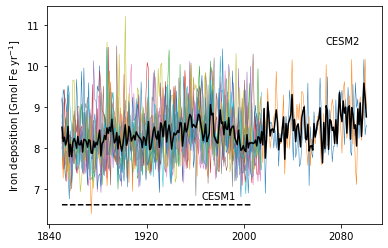

In [20]:
plot_name = f'timeseries.global.IRON_FLUX.pdf'

fig = plt.figure()
ax = fig.add_subplot(111)
for i in iron_flux_glb_combine.member_id.values:
    ax.plot(iron_flux_glb_combine.time, iron_flux_glb_combine.sel(member_id=i), linewidth=0.5)

ax.plot(iron_flux_glb_combine.time, iron_flux_glb_combine.mean('member_id'), color='k', linewidth=1.5)    

ax.plot(iron_flux_glb1.time, iron_flux_glb1.isel(member_id=0), linestyle='--', color='k', linewidth=1.5)    

ax.set_ylabel('Iron deposition [Gmol Fe yr$^{-1}$]');

ax.text(cftime.DatetimeNoLeap(2067, 1, 1), iron_flux_glb_combine.sel(time='2067').max('member_id')*1.05, 'CESM2',color='k');

ax.text(cftime.DatetimeNoLeap(1965, 1, 1), iron_flux_glb1.sel(time='1960')*1.02, 'CESM1',color='k');